## How to translate sampled instructions

This how-to guide is intended to show users how they can generate subexperiments which are already translated to a specified QPU architecture. This is useful as it prevents the need for transpiling each individual subexperiment. Users should now be able to transpile the cut circuit a single time and generate subexperiments which are already transpiled for the backend.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import PauliList

from circuit_knitting.cutting import (
    partition_problem,
    generate_cutting_experiments,
)

Prepare inputs to `generate_cutting_experiments`

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
observables = PauliList(["ZZ"])
partitioned_problem = partition_problem(
    circuit=circuit, partition_labels="AB", observables=observables
)
subcircuits = partitioned_problem.subcircuits
subobservables = partitioned_problem.subobservables

Call `generate_cutting_experiments` and don't specify any translation.

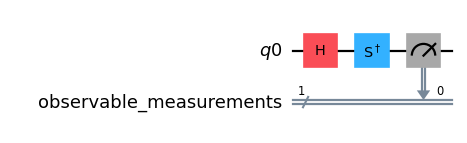

In [3]:
subexperiments, coefficients = generate_cutting_experiments(
    circuits=subcircuits,
    observables=subobservables,
    num_samples=1000,
)
subexperiments["A"][0].draw("mpl", style="iqp", scale=0.8)

Now call `generate_cutting_experiments` and translate the sampled instructions to the specified architecture. Valid input arguments are `"heron"` and `"eagle"`.

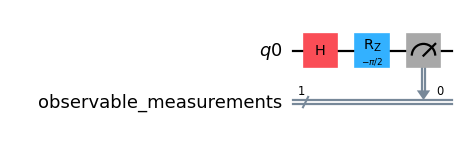

In [4]:
subexperiments, coefficients = generate_cutting_experiments(
    circuits=subcircuits,
    observables=subobservables,
    num_samples=1000,
    basis_gate_set="eagle",
)
subexperiments["A"][0].draw("mpl", style="iqp", scale=0.8)